# Comparative Analysis of Single-Activity Income Strategies in Stardew Valley

### Research Questions:
1. Which single activity generates the highest average income per season/year?
2. Are there statistically significant differences between income strategies?
3. How do in-game variables like activity type, season, and luck level influence income outcomes?

## I. Introduction and Setup

In [1]:
# Data manipulation and analysis
import pandas as pd 
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


## II. Load Datasets

In [2]:
farming = pd.read_csv('/Users/yscalify/Documents/GitHub/CCDATSCL_PROJECT/Weekly Datasets/Week_1-4.csv')
mining = pd.read_csv('/Users/yscalify/Documents/GitHub/CCDATSCL_PROJECT/Weekly Datasets/Week_5.csv')
fishing = pd.read_csv('/Users/yscalify/Documents/GitHub/CCDATSCL_PROJECT/Weekly Datasets/Week_6.csv')
foraging = pd.read_csv('/Users/yscalify/Documents/GitHub/CCDATSCL_PROJECT/Weekly Datasets/Week_7.csv')

print(f"Farming Dataset: {farming.shape}")
print(f"Mining Dataset: {mining.shape}")
print(f"Fishing Dataset: {fishing.shape}")
print(f"Foraging Dataset: {foraging.shape}")

Farming Dataset: (112, 24)
Mining Dataset: (112, 24)
Fishing Dataset: (112, 24)
Foraging Dataset: (112, 24)


In [3]:
print(f"First 5 Farming rows:\n{farming.head()}\n")
print(f"First 5 Mining rows:\n{mining.head()}\n")
print(f"First 5 Fishing rows:\n{fishing.head()}\n")
print(f"First 5 Foraging rows:\n{foraging.head()}\n")

First 5 Farming rows:
      Date   In-game Date Activity  Season Weather        Luck  \
0  12/7/25  Day 1, Year 1  Farming  Spring   Sunny  Very Happy   
1  12/7/25  Day 2, Year 1  Farming  Spring   Sunny     Neutral   
2  12/7/25  Day 3, Year 1  Farming  Spring   Rainy  Good Humor   
3  12/7/25  Day 4, Year 1  Farming  Spring   Sunny     Neutral   
4  12/7/25  Day 5, Year 1  Farming  Spring   Sunny     Neutral   

  Time Spent (in minutes) Gold on Hand Primary Activity Gold  \
0                 0:40:00          500                     0   
1                 1:10:00          500                     0   
2                 0:00:00          500                     0   
3                 2:10:00          500                     0   
4                 1:00:00           50                   603   

   Non-Activity Gold  ...   Hoe Scythe Pan       Rod Tackle Farming Lvl.  \
0                  0  ...  Base   Base NaN       NaN    NaN            0   
1                  0  ...  Base   Base NaN  

In [4]:
print(f"\nFarming Dataset Columns and Data Types:\n{farming.dtypes}\n")
print(f"\Mining Dataset Columns and Data Types:\n{mining.dtypes}\n")
print(f"\nFishing Dataset Columns and Data Types:\n{fishing.dtypes}\n")
print(f"\nForaging Dataset Columns and Data Types:\n{foraging.dtypes}\n")


Farming Dataset Columns and Data Types:
Date                           str
In-game Date                   str
Activity                       str
Season                         str
Weather                        str
Luck                           str
Time Spent (in minutes)        str
Gold on Hand                   str
Primary Activity Gold          str
Non-Activity Gold            int64
Expenses                       str
Pickaxe                        str
Axe                            str
Sword                          str
Hoe                            str
Scythe                         str
Pan                        float64
Rod                            str
Tackle                     float64
Farming Lvl.                 int64
Fishing Lvl.                 int64
Mining Lvl.                  int64
Foraging Lvl.                int64
Fighting Lvl.                int64
dtype: object

\Mining Dataset Columns and Data Types:
Date                           str
In-game Date                 

### Data Dictionary:


## III. Data Preprocessing

In [5]:
df = pd.concat([farming, mining, fishing, foraging], ignore_index=True)

print(f"Combined Dataset Shape: {df.shape}")
print(f"Activity distribution:")
print(df['Activity'].value_counts())

Combined Dataset Shape: (448, 24)
Activity distribution:
Activity
Farming     112
Mining      112
Fishing     112
Foraging    112
Name: count, dtype: int64


In [6]:
print(f"First 5 rows:\n{df.head()}\n")

First 5 rows:
      Date   In-game Date Activity  Season Weather        Luck  \
0  12/7/25  Day 1, Year 1  Farming  Spring   Sunny  Very Happy   
1  12/7/25  Day 2, Year 1  Farming  Spring   Sunny     Neutral   
2  12/7/25  Day 3, Year 1  Farming  Spring   Rainy  Good Humor   
3  12/7/25  Day 4, Year 1  Farming  Spring   Sunny     Neutral   
4  12/7/25  Day 5, Year 1  Farming  Spring   Sunny     Neutral   

  Time Spent (in minutes) Gold on Hand Primary Activity Gold  \
0                 0:40:00          500                     0   
1                 1:10:00          500                     0   
2                 0:00:00          500                     0   
3                 2:10:00          500                     0   
4                 1:00:00           50                   603   

   Non-Activity Gold  ...   Hoe Scythe Pan       Rod Tackle Farming Lvl.  \
0                  0  ...  Base   Base NaN       NaN    NaN            0   
1                  0  ...  Base   Base NaN       NaN

In [7]:
print(f"Missing values per column: {df.isnull().sum()}")

Missing values per column: Date                         0
In-game Date                 0
Activity                     0
Season                       0
Weather                      0
Luck                         0
Time Spent (in minutes)      0
Gold on Hand                 0
Primary Activity Gold        0
Non-Activity Gold            0
Expenses                     0
Pickaxe                      0
Axe                          0
Sword                      112
Hoe                          0
Scythe                       0
Pan                        448
Rod                        117
Tackle                     441
Farming Lvl.                 0
Fishing Lvl.                 0
Mining Lvl.                  0
Foraging Lvl.               54
Fighting Lvl.                0
dtype: int64


### Data Type Conversion

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     448 non-null    str    
 1   In-game Date             448 non-null    str    
 2   Activity                 448 non-null    str    
 3   Season                   448 non-null    str    
 4   Weather                  448 non-null    str    
 5   Luck                     448 non-null    str    
 6   Time Spent (in minutes)  448 non-null    str    
 7   Gold on Hand             448 non-null    str    
 8   Primary Activity Gold    448 non-null    str    
 9   Non-Activity Gold        448 non-null    int64  
 10  Expenses                 448 non-null    object 
 11  Pickaxe                  448 non-null    str    
 12  Axe                      448 non-null    str    
 13  Sword                    336 non-null    object 
 14  Hoe                      448 non-null

In [9]:
# Convert supposed numeric columns into numeric types
numeric_cols = ['Gold on Hand', 'Primary Activity Gold', 'Non-Activity Gold', 'Expenses', 'Farming Lvl.', 'Mining Lvl.', 'Fishing Lvl.', 'Foraging Lvl.', 'Fighting Lvl.']
for col in numeric_cols:
    if df[col].dtype == 'object' or df[col].dtype == 'int' or df[col].dtype == 'str':
        df[col] = df[col].astype(str).str.replace(',', '').astype(float)

time_components = pd.to_timedelta(df['Time Spent (in minutes)']).dt.components
df['Time Spent (in minutes)'] = time_components['hours'] * 60 + time_components['minutes']

# Convert categorical columns to category type
categorical_cols = ['Activity', 'Season', 'Weather', 'Luck', 'Pickaxe', 'Axe', 'Hoe', 'Sword', 'Hoe', 'Scythe', 'Pan', 'Rod', 'Tackle']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print(f"\nData types after conversion:\n{df.dtypes}\n")


Data types after conversion:
Date                            str
In-game Date                    str
Activity                   category
Season                     category
Weather                    category
Luck                       category
Time Spent (in minutes)       int64
Gold on Hand                float64
Primary Activity Gold       float64
Non-Activity Gold           float64
Expenses                    float64
Pickaxe                    category
Axe                        category
Sword                      category
Hoe                        category
Scythe                     category
Pan                        category
Rod                        category
Tackle                     category
Farming Lvl.                float64
Fishing Lvl.                float64
Mining Lvl.                 float64
Foraging Lvl.               float64
Fighting Lvl.               float64
dtype: object



### Extract New Features

In [10]:
df['Game Year'] = df['In-game Date'].str.extract(r'Year (\d+)').astype(int)
df['Game Day'] = df['In-game Date'].str.extract(r'Day (\d+)').astype(int)

season_offset = {'Spring': 0, 'Summer': 28, 'Fall': 56, 'Winter': 84}
df['Continuous Game Day'] = df['Season'].astype(str).map(season_offset) + df['Game Day'] + (df['Game Year'] - 1) * 112

season_order = ['Spring', 'Summer', 'Fall', 'Winter']
df['Season'] = pd.Categorical(df['Season'], categories=season_order, ordered=True)

tool_order = ['Base', 'Copper', 'Steel', 'Gold', 'Iridium']
tools = ['Pickaxe', 'Axe', 'Hoe', 'Scythe']
for tool in tools: 
    df[tool] = pd.Categorical(df[tool], categories=tool_order, ordered=True)
    
rod_order = ['None', 'Training', 'Bamboo', 'Fiberglass', 'Iridium']
df['Rod'] = pd.Categorical(df['Rod'], categories=rod_order, ordered=True)

sword_order = ['Rusty', 'Steel Smallsword', 'Wooden Blade', "Pirate's Sword", 'Silver Saber', 'Cutlass', 'Forest Sword', 'Iron Edge', 'Insect Head', 'Bone Sword', 'Claymore', "Neptune's Glaive", "Templar's Blade", 'Obsidian Edge', 'Ossified Blade', 'Holy Blade', 'Tempered Broadsword', 'Yeti Tooth', 'Steel Falchion', 'Dark Sword', 'Lava Katana', 'Dragontooth Cutlass', 'Dwarf Sword', 'Galaxy Sword', 'Infinity Blade']
df['Sword'] = pd.Categorical(df['Sword'], categories=sword_order, ordered=True)

luck_order = ['Unknown', 'Very Displeased', 'Annoyed/Mildly Perturbed', 'Absolutely Neutral', 'Neutral', 'Good Humor', 'Very Happy']
df['Luck'] = pd.Categorical(df['Luck'], categories=luck_order, ordered=True)

df['Net Activity Income'] = df.apply(lambda row: row['Primary Activity Gold'] - row['Expenses'], axis=1)
df['Gold Per Minute'] = df.apply(lambda row: row['Net Activity Income'] / row['Time Spent (in minutes)'] if row['Time Spent (in minutes)'] > 0 else 0, axis=1)

### Drop Columns

In [11]:
df.drop(columns=['Date', 'Pan'], inplace=True)

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   In-game Date             448 non-null    str     
 1   Activity                 448 non-null    category
 2   Season                   448 non-null    category
 3   Weather                  448 non-null    category
 4   Luck                     448 non-null    category
 5   Time Spent (in minutes)  448 non-null    int64   
 6   Gold on Hand             448 non-null    float64 
 7   Primary Activity Gold    448 non-null    float64 
 8   Non-Activity Gold        448 non-null    float64 
 9   Expenses                 448 non-null    float64 
 10  Pickaxe                  435 non-null    category
 11  Axe                      448 non-null    category
 12  Sword                    224 non-null    category
 13  Hoe                      448 non-null    category
 14  Scythe               

### Handle Outliers

In [12]:
Q1 = df['Gold Per Minute'].quantile(0.25)
Q3 = df['Gold Per Minute'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Gold Per Minute'] < lower_bound) | (df['Gold Per Minute'] > upper_bound)]

print(f"Identified {len(outliers)} outliers in 'Gold Per Minute' column.")
print(f"Outliers:\n{outliers[['Activity', 'Gold Per Minute']]}")
print(f"Summary statistics for 'Gold Per Minute':\n{df['Gold Per Minute'].describe()}")

Identified 75 outliers in 'Gold Per Minute' column.
Outliers:
    Activity  Gold Per Minute
5    Farming        -8.571429
9    Farming        44.000000
12   Farming       -11.428571
16   Farming        20.555556
18   Farming        -9.375000
..       ...              ...
216   Mining       -44.375000
219   Mining       -46.000000
260  Fishing       -22.496970
293  Fishing       -19.515789
321  Fishing       -33.914286

[75 rows x 2 columns]
Summary statistics for 'Gold Per Minute':
count    448.000000
mean       1.811289
std       31.679604
min     -442.666667
25%        0.073393
50%        1.559133
75%        5.517969
max      128.666667
Name: Gold Per Minute, dtype: float64


### Create Clean Dataset

In [13]:
df_clean = df.copy()

df_active = df_clean[df_clean['Time Spent (in minutes)'] > 0]

print(f"Original dataset: {len(df)} rows")
print(f"Active dataset (Time Spent > 0): {len(df_active)} rows")

print(df_active.info())

Original dataset: 448 rows
Active dataset (Time Spent > 0): 406 rows
<class 'pandas.DataFrame'>
Index: 406 entries, 0 to 447
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   In-game Date             406 non-null    str     
 1   Activity                 406 non-null    category
 2   Season                   406 non-null    category
 3   Weather                  406 non-null    category
 4   Luck                     406 non-null    category
 5   Time Spent (in minutes)  406 non-null    int64   
 6   Gold on Hand             406 non-null    float64 
 7   Primary Activity Gold    406 non-null    float64 
 8   Non-Activity Gold        406 non-null    float64 
 9   Expenses                 406 non-null    float64 
 10  Pickaxe                  397 non-null    category
 11  Axe                      406 non-null    category
 12  Sword                    197 non-null    category
 13  Hoe         

## III. Exploratory Data Analysis

### Overall Summary Statistics

In [14]:
key_columns = ['Net Activity Income', 'Gold Per Minute', 'Time Spent (in minutes)']

print('Summary statistics for all activities')
print(df_active[key_columns].describe())

Summary statistics for all activities
       Net Activity Income  Gold Per Minute  Time Spent (in minutes)
count           406.000000       406.000000               406.000000
mean            717.825123         1.998663               303.891626
std            2974.043329        33.276098               142.305976
min          -39840.000000      -442.666667                20.000000
25%             150.000000         0.398439               190.000000
50%             671.000000         2.194048               330.000000
75%            1716.250000         5.912500               410.000000
max           13395.000000       128.666667               720.000000


### Summary Statistics by Activity

In [15]:
activity_summary = df_active.groupby('Activity').agg({
    'Net Activity Income': ['mean', 'median', 'std'],
    'Primary Activity Gold': ['mean', 'median', 'std'],
    'Expenses': 'mean',
    'Gold Per Minute': 'mean',
    'Time Spent (in minutes)': 'mean',
    'Continuous Game Day': 'count',
}).round(2)

activity_summary.columns = ['_'.join(col).strip() for col in activity_summary.columns.values]

print("\nActivity Summary Statistics:")
display(activity_summary)

total_income = df_active.groupby('Activity')['Net Activity Income'].sum().sort_values(ascending=False)
print("\nTotal Net Income by Activity:")
display(total_income)


Activity Summary Statistics:


,Net Activity Income_mean,Net Activity Income_median,Net Activity Income_std,Primary Activity Gold_mean,Primary Activity Gold_median,Primary Activity Gold_std,Expenses_mean,Gold Per Minute_mean,Time Spent (in minutes)_mean,Continuous Game Day_count
Activity,,,,,,,,,,
Farming,859.60,1418.0,3292.93,1886.11,1817.0,1831.49,1026.51,5.58,146.42,109
Fishing,994.78,1374.5,2073.52,1369.30,1416.5,698.87,374.52,2.89,364.13,104
Foraging,277.73,200.0,258.07,277.73,200.0,258.07,0.00,0.67,420.67,105
Mining,740.02,835.0,4710.94,1698.26,1357.5,1594.27,958.24,-1.91,288.41,88



Total Net Income by Activity:


Activity
Fishing     103457.0
Farming      93696.0
Mining       65122.0
Foraging     29162.0
Name: Net Activity Income, dtype: float64

### Distribution Plots - Income by Activity

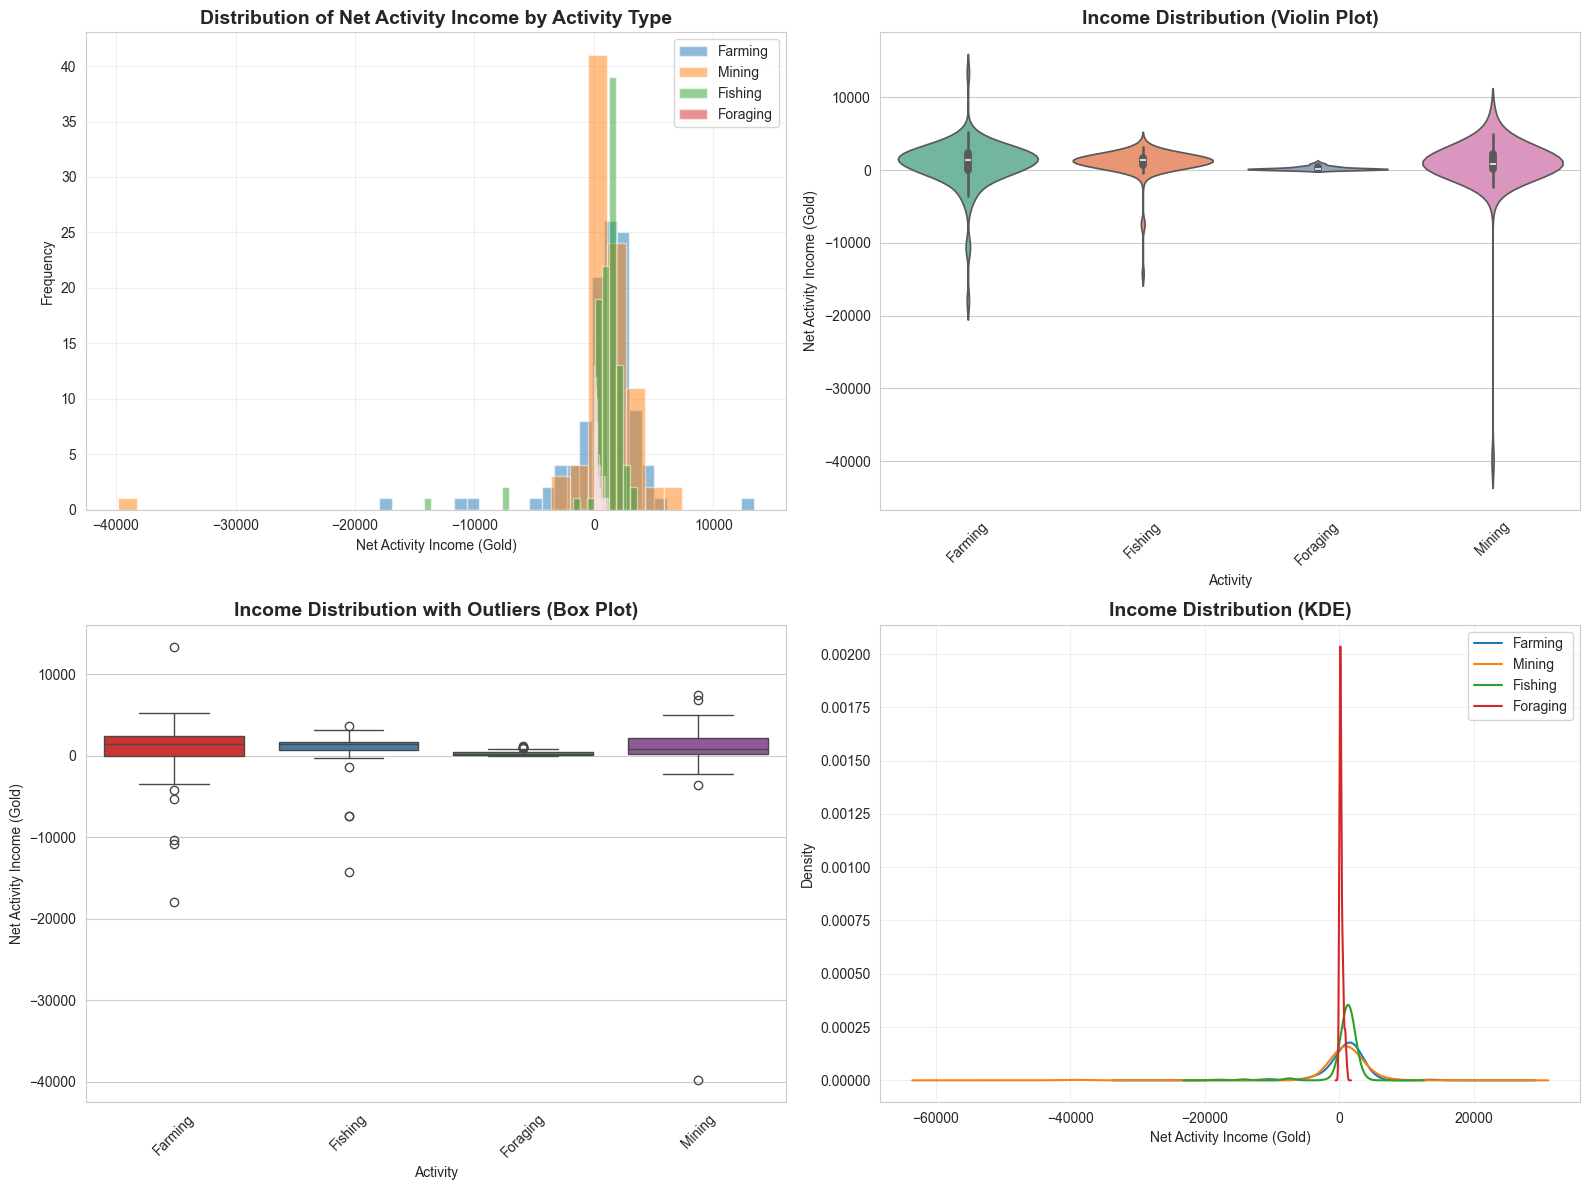

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram with KDE
for activity in df_active['Activity'].unique():
    activity_data = df_active[df_active['Activity'] == activity]['Net Activity Income']
    axes[0, 0].hist(activity_data, alpha=0.5, label=activity, bins=30)
axes[0, 0].set_xlabel('Net Activity Income (Gold)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Net Activity Income by Activity Type', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Violin plot
sns.violinplot(data=df_active, x='Activity', y='Net Activity Income', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Income Distribution (Violin Plot)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Net Activity Income (Gold)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Box plot
sns.boxplot(data=df_active, x='Activity', y='Net Activity Income', ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Income Distribution with Outliers (Box Plot)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Net Activity Income (Gold)')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. KDE plot
for activity in df_active['Activity'].unique():
    activity_data = df_active[df_active['Activity'] == activity]['Net Activity Income']
    activity_data.plot.kde(ax=axes[1, 1], label=activity)
axes[1, 1].set_xlabel('Net Activity Income (Gold)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Income Distribution (KDE)', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Income Comparison - Bar Charts

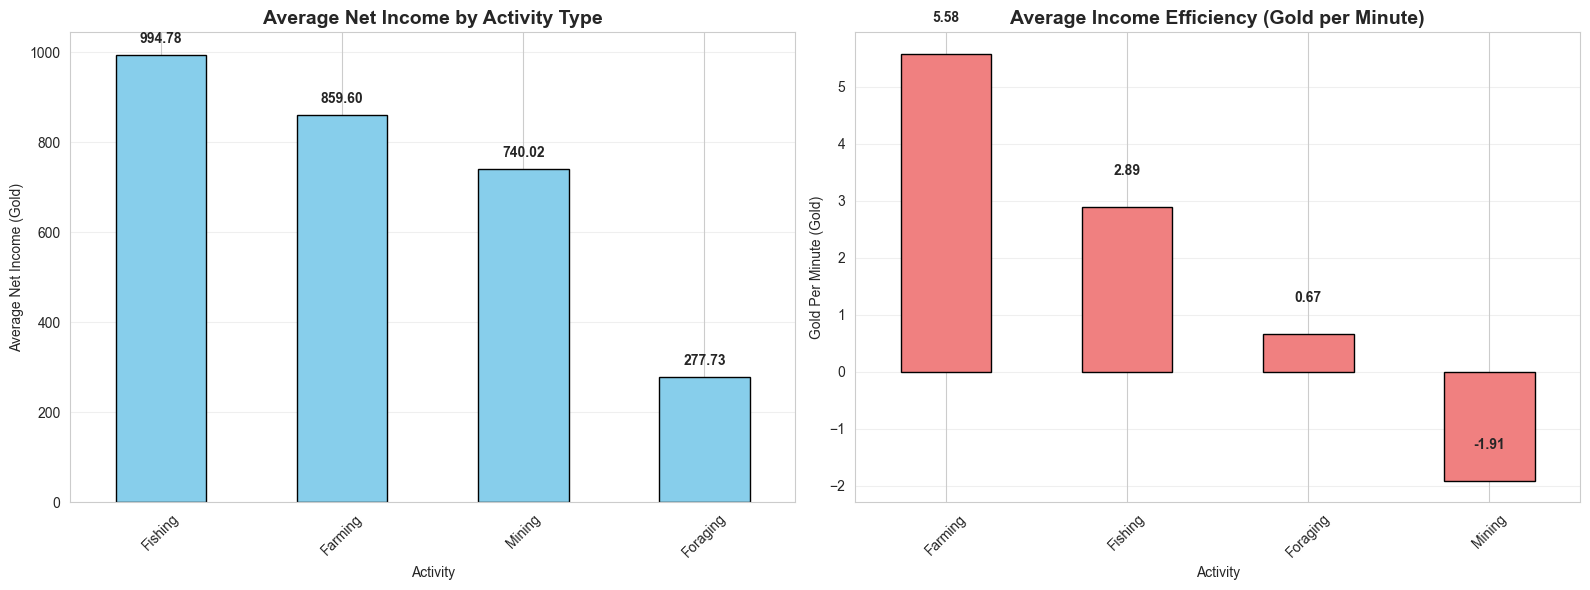

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Average income by activity
avg_income = df_active.groupby('Activity')['Net Activity Income'].mean().sort_values(ascending=False)
avg_income.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Average Net Income by Activity Type', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Net Income (Gold)')
axes[0].set_xlabel('Activity')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(avg_income):
    axes[0].text(i, v + 20, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# 2. Income efficiency (per minute)
avg_efficiency = df_active.groupby('Activity')['Gold Per Minute'].mean().sort_values(ascending=False)
avg_efficiency.plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Average Income Efficiency (Gold per Minute)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Gold Per Minute (Gold)')
axes[1].set_xlabel('Activity')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(avg_efficiency):
    axes[1].text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Seasonality Analysis

Average Income by Season and Activity


Activity,Farming,Fishing,Foraging,Mining
Season,,,,
Spring,104.33,591.92,190.31,310.71
Summer,628.85,760.27,246.44,1451.50
Fall,2240.68,1326.15,247.92,-483.72
Winter,421.07,1300.77,427.46,1650.12


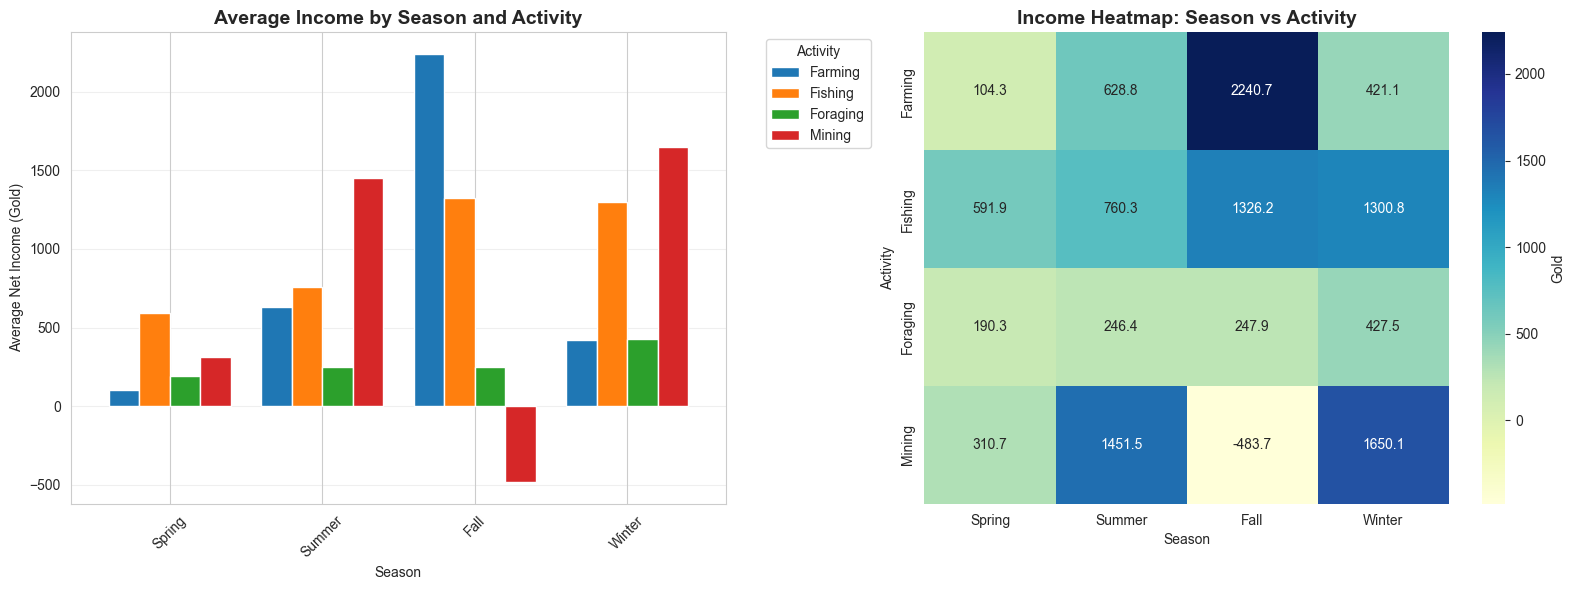

In [18]:
# Average income by season and activity
season_activity = df_active.groupby(['Season', 'Activity'])['Net Activity Income'].mean().unstack()

print('Average Income by Season and Activity')
display(season_activity.round(2))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Grouped bar chart
season_activity.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Average Income by Season and Activity', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Net Income (Gold)')
axes[0].set_xlabel('Season')
axes[0].legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# 2. Heatmap
sns.heatmap(season_activity.T, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[1], cbar_kws={'label': 'Gold'})
axes[1].set_title('Income Heatmap: Season vs Activity', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Activity')

plt.tight_layout()
plt.show()

### Time Series Analysis - Income Over Time

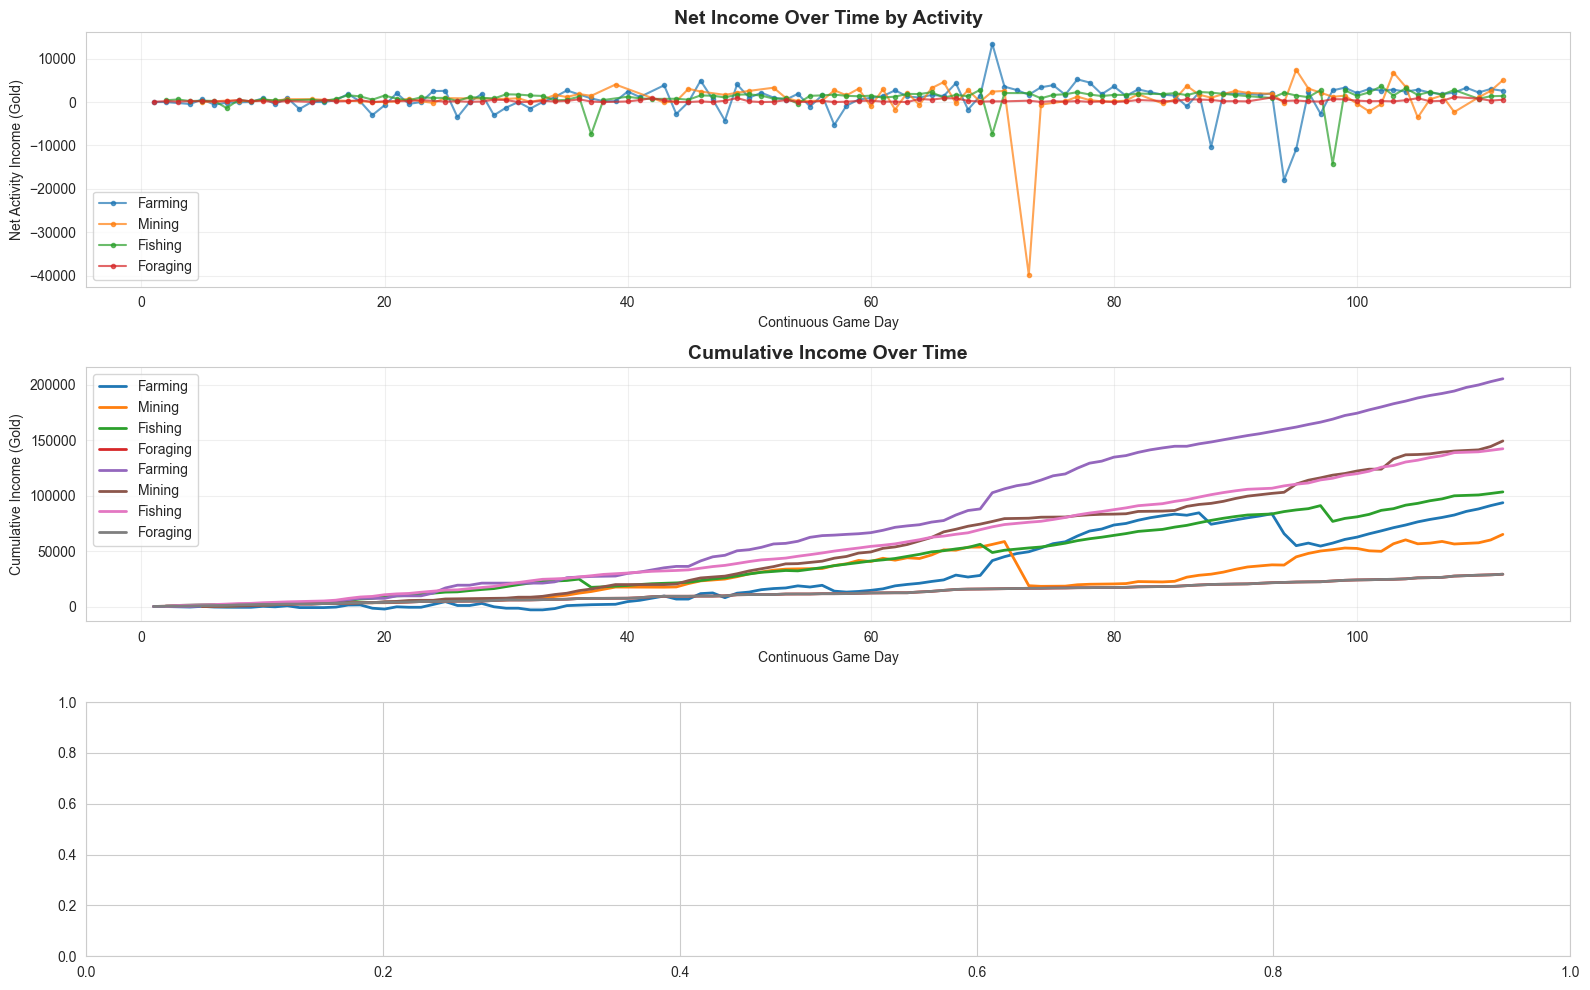

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

# 1. Line plot by activity
for activity in df_active['Activity'].unique():
    activity_data = df_active[df_active['Activity'] == activity].sort_values('Continuous Game Day')
    axes[0].plot(activity_data['Continuous Game Day'], activity_data['Net Activity Income'], 
                 marker='o', label=activity, alpha=0.7, markersize=3)
axes[0].set_title('Net Income Over Time by Activity', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Net Activity Income (Gold)')
axes[0].set_xlabel('Continuous Game Day')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2. Cumulative net income
for activity in df_active['Activity'].unique():
    activity_data = df_active[df_active['Activity'] == activity].sort_values('Continuous Game Day')
    cumulative = activity_data['Net Activity Income'].cumsum()
    axes[1].plot(activity_data['Continuous Game Day'], cumulative, label=activity, linewidth=2)
axes[1].set_title('Cumulative Net Income Over Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Cumulative Net Income (Gold)')
axes[1].set_xlabel('Continuous Game Day')
axes[1].legend()
axes[1].grid(alpha=0.3)

# 3. Cumulative primary activity gold
for activity in df_active['Activity'].unique():
    activity_data = df_active[df_active['Activity'] == activity].sort_values('Continuous Game Day')
    cumulative = activity_data['Primary Activity Gold'].cumsum()
    axes[2].plot(activity_data['Continuous Game Day'], cumulative, label=activity, linewidth=2)
axes[2].set_title('Cumulative Primary Activity Gold Over Time', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Cumulative Primary Activity Gold (Gold)')
axes[2].set_xlabel('Continuous Game Day')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Correlation Analysis

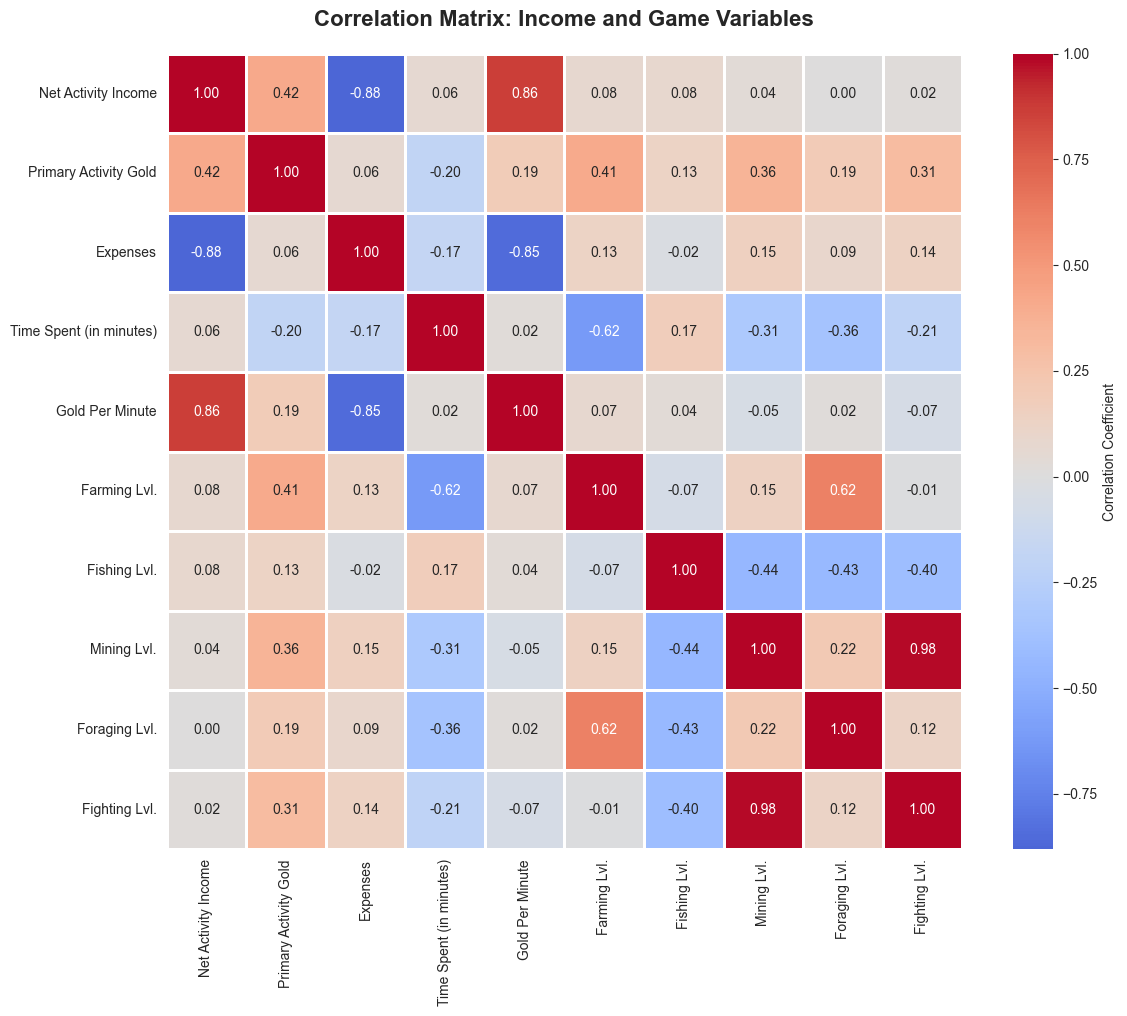


CORRELATIONS WITH NET ACTIVITY INCOME


Net Activity Income        1.000000
Gold Per Minute            0.860380
Primary Activity Gold      0.417403
Fishing Lvl.               0.082269
Farming Lvl.               0.077449
Time Spent (in minutes)    0.062441
Mining Lvl.                0.035063
Fighting Lvl.              0.019098
Foraging Lvl.              0.002415
Expenses                  -0.881411
Name: Net Activity Income, dtype: float64

In [24]:
numeric_features = ['Net Activity Income', 'Primary Activity Gold', 'Expenses', 'Time Spent (in minutes)', 
                   'Gold Per Minute', 'Farming Lvl.', 'Fishing Lvl.', 'Mining Lvl.', 
                   'Foraging Lvl.', 'Fighting Lvl.']

correlation_matrix = df_active[numeric_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix: Income and Game Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print strongest correlations with Net Activity Income
print("\n" + "=" * 80)
print("CORRELATIONS WITH NET ACTIVITY INCOME")
print("=" * 80)
income_corr = correlation_matrix['Net Activity Income'].sort_values(ascending=False)
display(income_corr)

### Luck Level Analysis

In [ ]:
luck_income = df_active.groupby(['Activity', 'Luck'])['Net Activity Income'].mean().unstack(fill_value=0)

print('Average Income by Luck Level and Activity')
display(luck_income.round(2))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Grouped bar chart
luck_income.T.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Average Income by Luck Level and Activity', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Net Income (Gold)')
axes[0].set_xlabel('Luck Level')
axes[0].legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# 2. Box plot by luck
sns.boxplot(data=df_active, x='Luck', y='Net Activity Income', ax=axes[1], palette='viridis')
axes[1].set_title('Income Distribution by Luck Level', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Net Activity Income (Gold)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Skill Level Progression Analysis

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Farming
farming_data = df_active[df_active['Activity'] == 'Farming']
axes[0].scatter(farming_data['Farming Lvl.'], farming_data['Net Activity Income'], alpha=0.5, color='green')
axes[0].set_title('Farming: Skill Level vs Income', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Farming Level')
axes[0].set_ylabel('Net Activity Income (Gold)')
axes[0].grid(alpha=0.3)

# Fishing
fishing_data = df_active[df_active['Activity'] == 'Fishing']
axes[1].scatter(fishing_data['Fishing Lvl.'], fishing_data['Net Activity Income'], alpha=0.5, color='blue')
axes[1].set_title('Fishing: Skill Level vs Income', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Fishing Level')
axes[1].set_ylabel('Net Activity Income (Gold)')
axes[1].grid(alpha=0.3)

# Mining
mining_data = df_active[df_active['Activity'] == 'Mining']
axes[2].scatter(mining_data['Mining Lvl.'], mining_data['Net Activity Income'], alpha=0.5, color='brown')
axes[2].set_title('Mining: Skill Level vs Income', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Mining Level')
axes[2].set_ylabel('Net Activity Income (Gold)')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## IV. Hypothesis Testing and Statistical Analysis

### Research Question #1: Overall Activity Comparison

**Hypothesis:**
- H₀ (Null): There is no significant difference in mean income between activities
- H₁ (Alternative): At least one activity has significantly different mean income

In [ ]:
# Prepare data for ANOVA
groups = [df_active[df_active['Activity'] == activity]['Net Activity Income'].values 
          for activity in df_active['Activity'].unique()]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)

print("One-way ANOVA: Income Differences Between Activities")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"\nSignificance level: α = 0.05")

if p_value < 0.05:
    print(f"\nRESULT: Reject null hypothesis (p < 0.05)")
    print("   There ARE statistically significant differences between activity incomes.")
else:
    print(f"\nRESULT: Fail to reject null hypothesis (p >= 0.05)")
    print("   No statistically significant differences found between activity incomes.")

In [ ]:
if p_value < 0.05:
    tukey_result = pairwise_tukeyhsd(
        endog=df_active['Net Activity Income'],
        groups=df_active['Activity'],
        alpha=0.05
    )
    
    print('Tukey HSD Post-Hoc Test: Pairwise Activity Comparisons')
    print(tukey_result)
    
    # Visualize the results
    fig = tukey_result.plot_simultaneous()
    plt.title('Tukey HSD: 95% Confidence Intervals for Mean Income Differences', fontsize=12, fontweight='bold')
    plt.xlabel('Mean Income Difference (Gold)')
    plt.tight_layout()
    plt.show()
else:
    print("Post-hoc test not needed - ANOVA showed no significant differences.")

### Research Question #2: Gold-per-minute Efficiency Comparison

**Hypothesis:**
- H₀ (Null): There is no significant difference in gold-per-minute between activities
- H₁ (Alternative): At least one activity has significantly different gold-per-minute

In [ ]:
# Prepare data for ANOVA
groups = [df_active[df_active['Activity'] == activity]['Gold Per Minute'].values 
          for activity in df_active['Activity'].unique()]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)

print("One-way ANOVA: Gold Per Minute Efficiency Differences Between Activities")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"\nSignificance level: α = 0.05")

if p_value < 0.05:
    print(f"\nRESULT: Reject null hypothesis (p < 0.05)")
    print("   There ARE statistically significant differences between gold per minute efficiency of each activity.")
else:
    print(f"\nRESULT: Fail to reject null hypothesis (p >= 0.05)")
    print("   No statistically significant differences found between gold per minute efficiency of each activity.")

In [ ]:
if p_value < 0.05:
    tukey_result = pairwise_tukeyhsd(
        endog=df_active['Gold Per Minute'],
        groups=df_active['Activity'],
        alpha=0.05
    )
    
    print('Tukey HSD Post-Hoc Test: Pairwise Activity Comparisons')
    print(tukey_result)
    
    # Visualize the results
    fig = tukey_result.plot_simultaneous()
    plt.title('Tukey HSD: 95% Confidence Intervals for Gold Per Minute Differences', fontsize=12, fontweight='bold')
    plt.xlabel('Mean Gold Per Minute Difference')
    plt.tight_layout()
    plt.show()
else:
    print("Post-hoc test not needed - ANOVA showed no significant differences.")

### Research Question #3: Influence of Season, Weather, Luck, and Tool/Skill Advancements

**Hypothesis:**
- H₀ (Null): Season, weather, luck, tool upgrades, and skill advancements have no significant influence to the income outcomes
- H₁ (Alternative): Season, weather, luck, tool upgrades, and skill advancements have a significant influence to the income outcomes

#### Weather Analysis

In [ ]:
# ANOVA for weather effects (pooled across all activities)
weather_groups = [df_active[df_active['Weather'] == weather]['Net Activity Income'].values 
                 for weather in df_active['Weather'].unique() if len(df_active[df_active['Weather'] == weather]) > 0]

f_stat_weather, p_value_weather = f_oneway(*weather_groups)

print("=" * 80)
print("One-way ANOVA: Weather Effects on Income (All Activities)")
print("=" * 80)
print(f"F-statistic: {f_stat_weather:.4f}")
print(f"P-value: {p_value_weather:.6f}")

if p_value_weather < 0.05:
    print(f"\nRESULT: Reject null hypothesis (p < 0.05)")
    print("   Weather DOES significantly affect income.")
else:
    print(f"\nRESULT: Fail to reject null hypothesis (p >= 0.05)")
    print("   Weather does NOT significantly affect income.")

#### Seasonal Analysis

In [ ]:
# ANOVA for seasonal effects (pooled across all activities)
season_groups = [df_active[df_active['Season'] == season]['Net Activity Income'].values 
                 for season in df_active['Season'].unique() if len(df_active[df_active['Season'] == season]) > 0]

f_stat_season, p_value_season = f_oneway(*season_groups)

print("=" * 80)
print("One-way ANOVA: Seasonal Effects on Income (All Activities)")
print("=" * 80)
print(f"F-statistic: {f_stat_season:.4f}")
print(f"P-value: {p_value_season:.6f}")

if p_value_season < 0.05:
    print(f"\nRESULT: Reject null hypothesis (p < 0.05)")
    print("   Season DOES significantly affect income.")
else:
    print(f"\nRESULT: Fail to reject null hypothesis (p >= 0.05)")
    print("   Season does NOT significantly affect income.")

#### Luck Level Analysis

In [ ]:
# Kruskal-Wallis H-test (non-parametric alternative to ANOVA)
luck_groups = [df_active[df_active['Luck'] == luck]['Net Activity Income'].values 
               for luck in df_active['Luck'].unique() if len(df_active[df_active['Luck'] == luck]) > 0]

h_stat, p_value_luck = kruskal(*luck_groups)

print("Kruskal-Wallis H-Test: Effect of Luck on Income")

print(f"\nH-statistic: {h_stat:.4f}")
print(f"P-value: {p_value_luck:.6f}")

if p_value_luck < 0.05:
    print(f"\nRESULT: Reject null hypothesis (p < 0.05)")
    print("   Luck level DOES significantly affect income.")
else:
    print(f"\nRESULT: Fail to reject null hypothesis (p >= 0.05)")
    print("   Luck level does NOT significantly affect income.")

#### Tool Upgrades

In [ ]:
# Kruskal-Wallis H-test (non-parametric alternative to ANOVA)
# Test each tool separately

tools = ['Pickaxe', 'Axe', 'Hoe', 'Scythe', 'Rod']

print("Kruskal-Wallis H-Test: Effect of Tool Upgrades on Income")

for tool in tools:
    tool_groups = [df_active[df_active[tool] == level]['Net Activity Income'].values 
                   for level in df_active[tool].cat.categories if len(df_active[df_active[tool] == level]) > 0]
    
    if len(tool_groups) > 1:  # Only run test if there are multiple groups
        h_stat, p_value_tool = kruskal(*tool_groups)
        
        print(f"\n{tool}:")
        print(f"  H-statistic: {h_stat:.4f}")
        print(f"  P-value: {p_value_tool:.6f}")
        
        if p_value_tool < 0.05:
            print(f"Result: Tool upgrade level DOES significantly affect income (p < 0.05)")
        else:
            print(f"Result: Tool upgrade level does NOT significantly affect income (p >= 0.05)")
    else:
        print(f"\n{tool}:")
        print(f"  Insufficient data (not enough groups to test)")

### Skill Advancements

In [ ]:
skill_levels = ['Farming Lvl.', 'Mining Lvl.', 'Fishing Lvl.', 'Foraging Lvl.', 'Fighting Lvl.']

print("Kruskal-Wallis H-Test: Effect of Skill Levels on Income")

for skill in skill_levels:
    skill_groups = [df_active[df_active[skill] == level]['Net Activity Income'].values 
                    for level in sorted(df_active[skill].unique()) if len(df_active[df_active[skill] == level]) > 0]
    
    if len(skill_groups) > 1:  # Only run test if there are multiple groups
        h_stat, p_value_skill = kruskal(*skill_groups)
        
        print(f"\n{skill}:")
        print(f"  H-statistic: {h_stat:.4f}")
        print(f"  P-value: {p_value_skill:.6f}")
        
        if p_value_skill < 0.05:
            print(f"Result: {skill} DOES significantly affect income (p < 0.05)")
        else:
            print(f"Result: {skill} does NOT significantly affect income (p >= 0.05)")
    else:
        print(f"\n{skill}:")
        print(f"  Insufficient data (not enough groups to test)")


### Effect Size Analysis (Cohen's d)

In [ ]:
# Calculate Cohen's d for pairwise activity comparisons
def cohens_d(group1, group2):
    """Calculate Cohen's d effect size"""
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

activities = df_active['Activity'].unique()
effect_sizes = []

print("=" * 80)
print("COHEN'S D EFFECT SIZES: Pairwise Activity Comparisons")
print("=" * 80)
print("Interpretation: |d| < 0.2 = negligible, 0.2-0.5 = small, 0.5-0.8 = medium, > 0.8 = large\n")

for i in range(len(activities)):
    for j in range(i+1, len(activities)):
        group1 = df_active[df_active['Activity'] == activities[i]]['Net Activity Income'].values
        group2 = df_active[df_active['Activity'] == activities[j]]['Net Activity Income'].values
        d = cohens_d(group1, group2)
        effect_sizes.append({
            'Comparison': f"{activities[i]} vs {activities[j]}",
            "Cohen's d": d,
            'Effect Size': 'Large' if abs(d) > 0.8 else 'Medium' if abs(d) > 0.5 else 'Small' if abs(d) > 0.2 else 'Negligible'
        })

effect_df = pd.DataFrame(effect_sizes)
display(effect_df)

## V. Visualizations and Insights

### Comprehensive Income Comparison

In [ ]:
# Create a comprehensive dashboard
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Mean income comparison
ax1 = fig.add_subplot(gs[0, 0])
mean_income = df_active.groupby('Activity')['Net Activity Income'].mean().sort_values(ascending=False)
mean_income.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Average Income by Activity', fontweight='bold')
ax1.set_xlabel('Gold')
for i, v in enumerate(mean_income.values):
    ax1.text(v + 10, i, f'{v:.0f}', va='center')

# 2. Income distribution
ax2 = fig.add_subplot(gs[0, 1])
sns.violinplot(data=df_active, y='Activity', x='Net Activity Income', ax=ax2, palette='Set2')
ax2.set_title('Income Distribution by Activity', fontweight='bold')
ax2.set_xlabel('Net Activity Income (Gold)')

# 3. Efficiency (income per minute)
ax3 = fig.add_subplot(gs[0, 2])
efficiency = df_active.groupby('Activity')['Gold Per Minute'].mean().sort_values(ascending=False)
efficiency.plot(kind='barh', ax=ax3, color='coral')
ax3.set_title('Income Efficiency (Gold/Minute)', fontweight='bold')
ax3.set_xlabel('Gold per Minute')

# 4. Seasonal breakdown
ax4 = fig.add_subplot(gs[1, :])
season_pivot = df_active.pivot_table(values='Net Activity Income', index='Activity', columns='Season', aggfunc='mean')
season_pivot.plot(kind='bar', ax=ax4, width=0.8)
ax4.set_title('Average Income by Activity and Season', fontweight='bold')
ax4.set_ylabel('Average Net Income (Gold)')
ax4.set_xlabel('Activity')
ax4.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

# 5. Cumulative income over time
ax5 = fig.add_subplot(gs[2, :])
for activity in df_active['Activity'].unique():
    activity_data = df_active[df_active['Activity'] == activity].sort_values('Date')
    cumulative = activity_data['Net Activity Income'].cumsum()
    ax5.plot(activity_data['Date'], cumulative, label=activity, linewidth=2.5)
ax5.set_title('Cumulative Income Over Time', fontweight='bold', fontsize=14)
ax5.set_ylabel('Cumulative Net Income (Gold)')
ax5.set_xlabel('Date')
ax5.legend(loc='upper left')
ax5.grid(alpha=0.3)

plt.suptitle('Stardew Valley Income Analysis Dashboard', fontsize=18, fontweight='bold', y=0.995)
plt.show()

### Key Performance Indicators (KPIs) Summary Table

In [ ]:
# Create comprehensive KPI table
kpi_data = []

for activity in df_active['Activity'].unique():
    activity_df = df_active[df_active['Activity'] == activity]
    
    kpi_data.append({
        'Activity': activity,
        'Days Played': len(activity_df),
        'Total Income': activity_df['Net Activity Income'].sum(),
        'Avg Income/Day': activity_df['Net Activity Income'].mean(),
        'Median Income/Day': activity_df['Net Activity Income'].median(),
        'Std Dev': activity_df['Net Activity Income'].std(),
        'Min Income': activity_df['Net Activity Income'].min(),
        'Max Income': activity_df['Net Activity Income'].max(),
        'Avg Time (min)': activity_df['Time Duration (in minutes)'].mean(),
        'Gold/Minute': activity_df['Gold Per Minute'].mean(),
        'Best Season': activity_df.groupby('Season')['Net Activity Income'].mean().idxmax()
    })

kpi_df = pd.DataFrame(kpi_data).round(2)
kpi_df = kpi_df.sort_values('Avg Income/Day', ascending=False)


print("Key Performance Indicators (KPIs) by Activity")

display(kpi_df.style.background_gradient(subset=['Avg Income/Day', 'Gold/Minute'], cmap='YlGn'))

### Risk-Return Analysis (Income vs. Variance)

In [ ]:
# Scatter plot: Mean income vs Standard deviation
risk_return = df_active.groupby('Activity').agg({
    'Net Activity Income': ['mean', 'std']
}).round(2)
risk_return.columns = ['Mean_Income', 'Std_Dev']

plt.figure(figsize=(10, 6))
for activity in risk_return.index:
    plt.scatter(risk_return.loc[activity, 'Std_Dev'], 
               risk_return.loc[activity, 'Mean_Income'],
               s=200, alpha=0.6, label=activity)
    plt.annotate(activity, 
                (risk_return.loc[activity, 'Std_Dev'], 
                 risk_return.loc[activity, 'Mean_Income']),
                fontsize=11, fontweight='bold')

plt.xlabel('Income Variability (Std Dev)', fontsize=12)
plt.ylabel('Average Income (Gold)', fontsize=12)
plt.title('Risk-Return Profile: Income Stability vs Profitability', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Higher and to the left = High return, low risk (most desirable)")
print("- Higher and to the right = High return, high risk (high variance)")
print("- Lower and to the left = Low return, low risk (consistent but low profit)")

## VI. Summary

In [ ]:
# Generate automated summary
best_activity = df_active.groupby('Activity')['Net Activity Income'].mean().idxmax()
best_avg_income = df_active.groupby('Activity')['Net Activity Income'].mean().max()

most_efficient = df_active.groupby('Activity')['Gold Per Minute'].mean().idxmax()
best_efficiency = df_active.groupby('Activity')['Gold Per Minute'].mean().max()

most_stable = df_active.groupby('Activity')['Net Activity Income'].std().idxmin()
lowest_variance = df_active.groupby('Activity')['Net Activity Income'].std().min()


print("EXECUTIVE SUMMARY: STARDEW VALLEY INCOME STRATEGY ANALYSIS")

print()
print("RESEARCH QUESTION 1: Highest Average Income")
print(f"   → Best Activity: {best_activity}")
print(f"   → Average Income: {best_avg_income:.2f} gold/day")
print()
print("RESEARCH QUESTION 2: Gold-Per-Minute Efficiency")
print(f"   → Most Efficient Activity: {most_efficient}")
print(f"   → Best Efficiency: {best_efficiency:.2f} gold/minute")
print()
print("RESEARCH QUESTION 3: Variable Influences on Income")
print(f"   → Season Effect: {'SIGNIFICANT (p < 0.05)' if p_value_season < 0.05 else 'NOT SIGNIFICANT (p >= 0.05)'} | p = {p_value_season:.6f}")
print(f"   → Weather Effect: {'SIGNIFICANT (p < 0.05)' if p_value_weather < 0.05 else 'NOT SIGNIFICANT (p >= 0.05)'} | p = {p_value_weather:.6f}")
print(f"   → Luck Effect: {'SIGNIFICANT (p < 0.05)' if p_value_luck < 0.05 else 'NOT SIGNIFICANT (p >= 0.05)'} | p = {p_value_luck:.6f}")
print()
print("TOOL UPGRADE EFFECTS:")
print("   See detailed tool analysis above for individual tool upgrade significance")
print()
print("SKILL ADVANCEMENT EFFECTS:")
print("   See detailed skill analysis above for individual skill level significance")
print()
print("STABILITY PROFILE:")
print(f"   → Most Stable Activity: {most_stable}")
print(f"   → Lowest Income Variance: {lowest_variance:.2f}")
print()


